In [2]:
# Author Kyle Larson
# Filename: Practice.ipynb
# License: GNU GENERAL PUBLIC LICENSE Version 3, 29 June 2007
# Description: The objective of this Python Notebook is an exercize in inporting and plotting HR Data
import pandas
pandas.__version__

'1.0.1'

In [10]:
# Frame 1 : The data are imported and printed as directly recieved from the detection device.
# There are unnecessary values and each value is an array of characters, interpreted in python,
# to be strings.
#
import csv
import math
with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\Heart_Rate_July_10.csv", mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    for row in csv_reader:
        if(math.remainder(line_count, 100)==0):
            print(row)
        line_count +=1

['Start', 'Finish', 'Heart', 'Rate', '(count/min)']
['10-Jul-2020', '22:10', '10-Jul-2020', '22:10', '46']
['11-Jul-2020', '06:30', '11-Jul-2020', '06:30', '61']
['11-Jul-2020', '07:19', '11-Jul-2020', '07:19', '78']
['11-Jul-2020', '07:29', '11-Jul-2020', '07:29', '112']
['11-Jul-2020', '07:38', '11-Jul-2020', '07:38', '95']
['11-Jul-2020', '07:46', '11-Jul-2020', '07:46', '97']
['11-Jul-2020', '07:55', '11-Jul-2020', '07:55', '127']
['11-Jul-2020', '08:04', '11-Jul-2020', '08:04', '127']
['11-Jul-2020', '08:12', '11-Jul-2020', '08:12', '116']
['11-Jul-2020', '08:21', '11-Jul-2020', '08:21', '86']
['11-Jul-2020', '22:50', '11-Jul-2020', '22:50', '47']
['12-Jul-2020', '07:12', '12-Jul-2020', '07:12', '63']
['12-Jul-2020', '07:27', '12-Jul-2020', '07:27', '136']
['12-Jul-2020', '07:36', '12-Jul-2020', '07:36', '79']
['12-Jul-2020', '07:45', '12-Jul-2020', '07:45', '121']
['12-Jul-2020', '07:53', '12-Jul-2020', '07:53', '127']
['12-Jul-2020', '08:01', '12-Jul-2020', '08:01', '127']
['12-

In [7]:
# Some formatting was performed in spreadsheet software to quickly format each value. However the 
# file may be noisy, as it hasn't been plotted yet, and still has 10,000 lines.
import csv
import math
import pandas

with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\Heart_Rate_July_10_timerate2.csv", mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0

    for row in csv_reader:
        if(math.remainder(line_count, 100)==0 and line_count!=0):
            print([int(row[0]), int(row[1])])
        line_count +=1

[202007102210, 46]
[202007110630, 61]
[202007110719, 78]
[202007110729, 112]
[202007110738, 95]
[202007110746, 97]
[202007110755, 127]
[202007110804, 127]
[202007110812, 116]
[202007110821, 86]
[202007112250, 47]
[202007120712, 63]
[202007120727, 136]
[202007120736, 79]
[202007120745, 121]
[202007120753, 127]
[202007120801, 127]
[202007120812, 160]
[202007120821, 154]
[202007120829, 140]
[202007120838, 161]
[202007120846, 144]
[202007120855, 152]
[202007120903, 98]
[202007120912, 107]
[202007120921, 119]
[202007121126, 127]
[202007121240, 140]
[202007121249, 134]
[202007121257, 99]
[202007121306, 84]
[202007121315, 84]
[202007121324, 79]
[202007121333, 80]
[202007121342, 88]
[202007121351, 83]
[202007121359, 78]
[202007121408, 97]
[202007121417, 128]
[202007121709, 61]
[202007130716, 121]
[202007130724, 64]
[202007130733, 85]
[202007130741, 89]
[202007130750, 123]
[202007130758, 118]
[202007130807, 111]
[202007130815, 88]
[202007130823, 123]
[202007130831, 99]
[202007131535, 52]
[20200

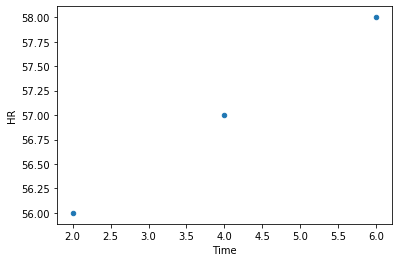

In [29]:
# I will run a quick test to make sure data frame will work for the application of plotting the HR data.
import pandas
d ={ 'Time' : [2,4,6],
'HR' : [56,57,58] }
df = pandas.DataFrame(d, columns=['Time','HR'])
df.plot(kind='scatter', x='Time', y="HR")

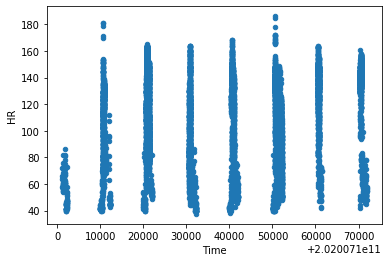

In [63]:
# The data are imported and plotted.
# Dealing with the time breaks between days will be required to begin evaluating how to analy
#
import csv
import math
import pandas

with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\Heart_Rate_July_10_timerate2.csv", mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    d ={ 'Time' : [202007160642], 'HR' :[137]}
        
    df = pandas.DataFrame(d, columns=['Time','HR'])
  
    for row in csv_reader:
        if(line_count>0):
            df = df.append({'Time':int(row[0]), 'HR':float(row[1])}, ignore_index=True)
        line_count +=1
    df.plot(kind='scatter', x='Time', y="HR")

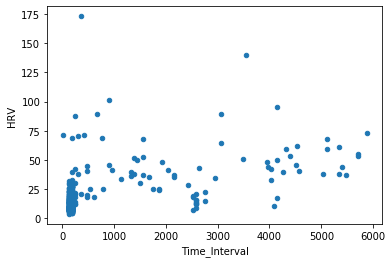

In [2]:
# An attempt is made to calculate heart rate variability.
# Originally Heart Rate variability was going to be calculated as 
# RMSSD, Root Mean Square of Successive Differences. The range of values produced when 
# mean (time average) was calculated  were noted to be out of range of values expected in the 
# literature, < https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/ > 
# and < https://www.whoop.com/thelocker/heart-rate-variability-hrv/ >
# The issue of defining hr variability for this set was a challenge that was set asside until
# the large gaps resulting from the data being taken on different days could be resolved.
import csv
import math
import pandas

with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\Heart_Rate_July_10_timerate2.csv", mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    HRV_sampling_iter =0
    Running_Sum_HR =0
    Time_interval=0
    prev_HR=0.0
    d ={ 'Time' : [202007160642], 'HR' :[137]}
        
    df_HR = pandas.DataFrame(d, columns=['Time','HR'])
    df_HRV = pandas.DataFrame(d, columns=['Time_Interval','HRV'])
    for row in csv_reader:
        if(line_count>0):
            df_HR = df_HR.append({'Time':int(row[0]), 'HR':float(row[1])}, ignore_index=True)
        
        if(HRV_sampling_iter>0):
            Running_Sum_HR=Running_Sum_HR + pow((float(row[1])-prev_HR), 2)
       
        if(HRV_sampling_iter==29):
            #note: large gaps in data, such as HR taken on different days, need to be removed
            #hours to minutes
            Time_interval = (df_HR.loc[line_count]['Time']-df_HR.loc[line_count-29]['Time']-(df_HR.loc[line_count]['Time']-df_HR.loc[line_count-29]['Time'])%1000)*60/1000
            #parse the minutes
            Time_interval = Time_interval+ ((df_HR.loc[line_count]['Time']-df_HR.loc[line_count-29]['Time'])-Time_interval)/100
            #parsse the seconds
            Time_interval = Time_interval+ ((df_HR.loc[line_count]['Time']-df_HR.loc[line_count-29]['Time'])%100)*60
            df_HRV = df_HRV.append({'Time_Interval':Time_interval,'HRV':pow((Running_Sum_HR), 0.5)}, ignore_index=True )
        if(HRV_sampling_iter==30):
            HRV_sampling_iter=0
            Running_Sum_HR=0
            
        HRV_sampling_iter +=1
        
        if(line_count>0): 
            prev_HR = float(row[1])
        
        line_count +=1
        #if(line_count==1600): #This is just to limit number of rows executed for debugging
            #break
df_HRV.plot(kind='scatter', x='Time_Interval', y='HRV')

In [11]:
# The solution to the gaps by date was to write each day to a separate file which could be 
# handled with string arrithmetic in the file names.
# File name iteration was tested prior to use.
print(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\By Day\Heart_Rate_"+ str(Nextdate/10000) +".csv")
print(df.loc[:10,])

C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\By Day\Heart_Rate_20200717.0.csv
            Time    HR
0   0.000000e+00   0.0
1   2.020071e+11  58.0
2   2.020071e+11  64.0
3   2.020071e+11  72.0
4   2.020071e+11  66.0
5   2.020071e+11  61.0
6   2.020071e+11  66.0
7   2.020071e+11  68.0
8   2.020071e+11  76.0
9   2.020071e+11  66.0
10  2.020071e+11  56.0


In [51]:
#  The HR Data were opened and written to separate files
import csv
import math
import pandas
with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\Heart_Rate_July_10_timerate2.csv", mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count =0
    start_file_index =0
    Nextdate =0
    date =0
    d ={ 'Time':[0] , 'HR':[0] }
        
    df = pandas.DataFrame(d, columns=['Time','HR'])
    
    for row in csv_reader:
        if(line_count>0):
            df = df.append({'Time':int(row[0]), 'HR':float(row[1])}, ignore_index=True)
            Nextdate = df.loc[line_count][0] - (df.loc[line_count][0]%10000)
        
        if(line_count>1 and Nextdate-date >= 10000):
            with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\By Day\Heart_Rate_"+ str(Nextdate/10000) +".csv", mode='w') as outf:
                i =start_file_index
                outf.write("Time, HR\n")
                while(i<line_count):
                    outf.write(str(df.loc[i][0])+", "+str(df.loc[i][1])+"\n")
                    i +=1
                start_file_index = line_count

        line_count +=1
        
        date = Nextdate

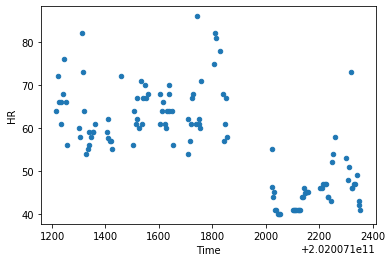

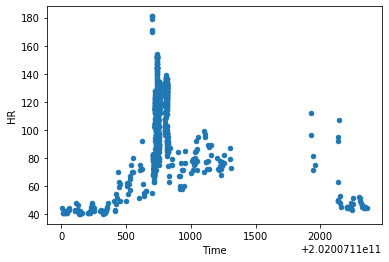

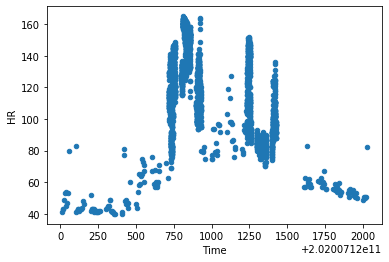

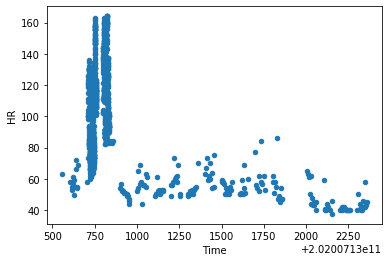

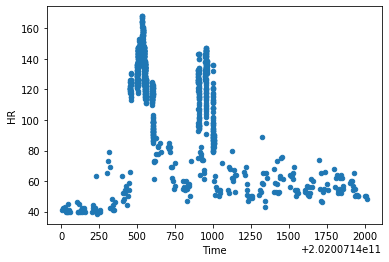

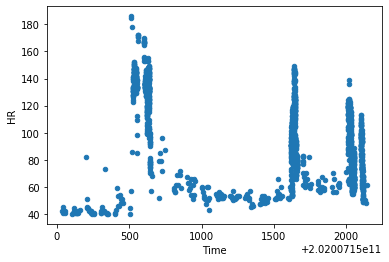

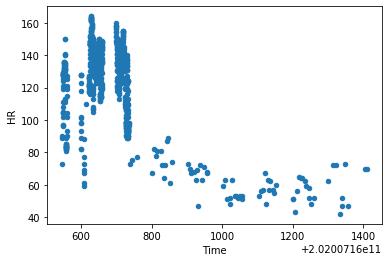

In [17]:
# Each file was then reopened and plotted
import csv
import math
import pandas
timeStamp =20200711.0
while(timeStamp < 20200718.0):
    with open(r"C:\Users\admin\anaconda3\01 PROJECTS\02 HEART RATE\By Day\Heart_Rate_"+str(timeStamp)+".csv", mode='r') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count =0
       
        df = pandas.DataFrame()

        for row in csv_reader:
            if(line_count>1):
                df = df.append({'Time':float(row[0]), 'HR':float(row[1])}, ignore_index=True)
            line_count +=1
    df.drop(index=1)
    df.plot(kind='scatter', x='Time', y='HR')
    timeStamp +=1